In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

# 1. Logistic Regression



In [2]:
from sklearn.datasets import make_moons

data, labels = make_moons(n_samples=300, noise=0.2)

print(data.shape, labels.shape)

(300, 2) (300,)


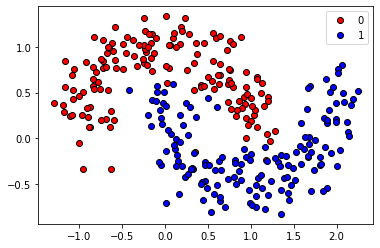

In [3]:
plt.plot(data[labels == 0, 0], data[labels == 0, 1],
         color="r", label="0", ls="none", marker="o", mec="k")
plt.plot(data[labels == 1, 0], data[labels == 1, 1],
         color="b", label="1", ls="none", marker="o", mec="k")
plt.legend()

This dataset is clearly not linearly separable. Therefore, using a logistic regression algorithm to classify it is bound to failure, since it can only ever generate hyperplanes as decision boundaries.


In [4]:
from sklearn.model_selection import ShuffleSplit

split = ShuffleSplit(n_splits=2, test_size=0.2, random_state=25092022)

for train_index, test_index in split.split(data):
    train_set = data[train_index]
    test_set = data[test_index]

    train_labels = labels[train_index]
    test_labels = labels[test_index]

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression(solver="liblinear")

parameter_grid = {
    "C": np.logspace(-5, 5, 50),
    "penalty": ["l2"]
}

grid_search = GridSearchCV(estimator=logistic_regression,
                           param_grid=parameter_grid,
                           scoring="accuracy",
                           cv=10)

grid_search.fit(train_set, train_labels)  

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94...
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05]),
                         'penalty': ['l2']},
             scoring='accuracy')

In [6]:
model = grid_search.best_estimator_
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 8.286427728546842, 'penalty': 'l2'}
0.85


In the problem statement, it's asked to explicit the learning rate used. Since the ```scikit-learn``` LogisticRegression is not implemented with Stochastic Gradient Descent, it doesn't have such hyperparameter.


In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

predictions = model.predict(test_set)

accuracy = accuracy_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)
cm = confusion_matrix(test_labels, predictions)

logistic_regression_results = {
    "accuracy": accuracy,
    "f1": f1, 
    "confusion_matrix": cm
}

print(f"Accuracy: {accuracy:.3f}, F1 Score: {f1:.3f}")
print(cm)

Accuracy: 0.867, F1 Score: 0.833
[[32  5]
 [ 3 20]]


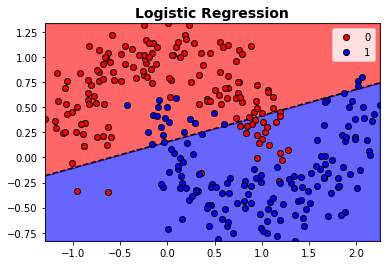

In [8]:
b = model.intercept_
w1, w2 = model.coef_.T
intercept = -b/w2
slope = -w1/w2

# Plot decision boundary
line, = plt.plot([data.min(), data.max()],
                 slope*np.array([data.min(),data.max()]) + intercept,
                 ls="--", color="k")
plt.fill_between(line.get_xdata(),
                 line.get_ydata(), data[:, 1].max()*np.ones(2),
                 color="r", alpha=0.6)
plt.fill_between(line.get_xdata(),
                 data[:, 1].min()*np.ones(2),line.get_ydata(),
                 color="b", alpha=0.6)
# Plot data
plt.plot(data[labels == 0, 0], data[labels == 0, 1],
         color="r", label="0", ls="none", marker="o", mec="k")
plt.plot(data[labels == 1, 0], data[labels == 1, 1],
         color="b", label="1", ls="none", marker="o", mec="k")
plt.title("Logistic Regression",
          fontsize=14, fontweight="bold")
plt.xlim(data[:, 0].min(), data[:, 0].max())
plt.ylim(data[:, 1].min(), data[:, 1].max())
plt.legend()

As expected, we won't be able to achieve much better results than this

 # 2. Neural Network

In [9]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()

parameter_grid = {
    "alpha": np.logspace(-5, 5, 50),
    "penalty": ["l2"]
}

grid_search = GridSearchCV(estimator=perceptron,
                           param_grid=parameter_grid,
                           scoring="accuracy",
                           cv=10)

grid_search.fit(train_set, train_labels)  

GridSearchCV(cv=10, estimator=Perceptron(),
             param_grid={'alpha': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e-02, 4.71486636e...
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05]),
                         'penalty': ['l2']},
             scoring='accuracy')

In [10]:
model = grid_search.best_estimator_
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 6.55128556859551e-05, 'penalty': 'l2'}
0.8375


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

predictions = model.predict(test_set)

accuracy = accuracy_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)
cm = confusion_matrix(test_labels, predictions)

perceptron_results = {
    "accuracy": accuracy,
    "f1": f1, 
    "confusion_matrix": cm
}

print(f"Accuracy: {accuracy:.3f}, F1 Score: {f1:.3f}")
print(cm)

Accuracy: 0.683, F1 Score: 0.296
[[37  0]
 [19  4]]


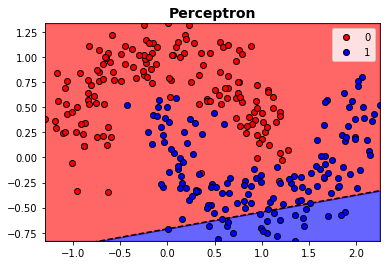

In [12]:
b = model.intercept_
w1, w2 = model.coef_.T
intercept = -b/w2
slope = -w1/w2

# Plot decision boundary
line, = plt.plot([data.min(), data.max()],
                 slope*np.array([data.min(),data.max()]) + intercept,
                 ls="--", color="k")
plt.fill_between(line.get_xdata(),
                 line.get_ydata(), data[:, 1].max()*np.ones(2),
                 color="r", alpha=0.6)
plt.fill_between(line.get_xdata(),
                 data[:, 1].min()*np.ones(2),line.get_ydata(),
                 color="b", alpha=0.6)
# Plot data
plt.plot(data[labels == 0, 0], data[labels == 0, 1],
         color="r", label="0", ls="none", marker="o", mec="k")
plt.plot(data[labels == 1, 0], data[labels == 1, 1],
         color="b", label="1", ls="none", marker="o", mec="k")
plt.title("Perceptron",
          fontsize=14, fontweight="bold")
plt.xlim(data[:, 0].min(), data[:, 0].max())
plt.ylim(data[:, 1].min(), data[:, 1].max())
plt.legend()

In [13]:
print(logistic_regression_results)
print(perceptron_results)

{'accuracy': 0.8666666666666667, 'f1': 0.8333333333333333, 'confusion_matrix': array([[32,  5],
       [ 3, 20]])}
{'accuracy': 0.6833333333333333, 'f1': 0.29629629629629634, 'confusion_matrix': array([[37,  0],
       [19,  4]])}


The results are about the same, as to be expected since both models are linear.

In [14]:
from sklearn.datasets import make_circles

data, labels = make_circles(n_samples=300, noise=0.2, factor=0.4)

print(data.shape, labels.shape)

(300, 2) (300,)


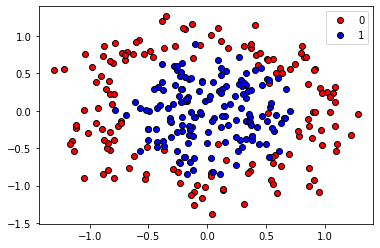

In [15]:
plt.plot(data[labels == 0, 0], data[labels == 0, 1],
         color="r", label="0", ls="none", marker="o", mec="k")
plt.plot(data[labels == 1, 0], data[labels == 1, 1],
         color="b", label="1", ls="none", marker="o", mec="k")
plt.legend()

The ```factor``` parameter in ```make_circles``` control how separated the circles are. If left as default (```factor = 0.8```), they are essentially overlapped and classification would become hard. Even by making the circles clearly separated, we can expect the Perceptron to perform poorly since this dataset remains not linearly separable.

In [16]:
split = ShuffleSplit(n_splits=2, test_size=0.2, random_state=25092022)

for train_index, test_index in split.split(data):
    train_set = data[train_index]
    test_set = data[test_index]

    train_labels = labels[train_index]
    test_labels = labels[test_index]

perceptron = Perceptron()

parameter_grid = {
    "alpha": np.logspace(-5, 5, 50),
    "penalty": ["l2"]
}

grid_search = GridSearchCV(estimator=perceptron,
                           param_grid=parameter_grid,
                           scoring="accuracy",
                           cv=10)

grid_search.fit(train_set, train_labels)

predictions = model.predict(test_set)

accuracy = accuracy_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)
cm = confusion_matrix(test_labels, predictions)

perceptron_circles_results = {
    "accuracy": accuracy,
    "f1": f1, 
    "confusion_matrix": cm
}

print(f"Accuracy: {accuracy:.3f}, F1 Score: {f1:.3f}")
print(cm)

Accuracy: 0.383, F1 Score: 0.051
[[22  7]
 [30  1]]


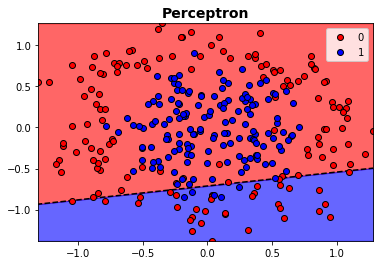

In [17]:
b = model.intercept_
w1, w2 = model.coef_.T
intercept = -b/w2
slope = -w1/w2

# Plot decision boundary
line, = plt.plot([data.min(), data.max()],
                 slope*np.array([data.min(),data.max()]) + intercept,
                 ls="--", color="k")
plt.fill_between(line.get_xdata(),
                 line.get_ydata(), data[:, 1].max()*np.ones(2),
                 color="r", alpha=0.6)
plt.fill_between(line.get_xdata(),
                 data[:, 1].min()*np.ones(2),line.get_ydata(),
                 color="b", alpha=0.6)
# Plot data
plt.plot(data[labels == 0, 0], data[labels == 0, 1],
         color="r", label="0", ls="none", marker="o", mec="k")
plt.plot(data[labels == 1, 0], data[labels == 1, 1],
         color="b", label="1", ls="none", marker="o", mec="k")
plt.title("Perceptron",
          fontsize=14, fontweight="bold")
plt.xlim(data[:, 0].min(), data[:, 0].max())
plt.ylim(data[:, 1].min(), data[:, 1].max())
plt.legend()

In [18]:
print(perceptron_results)
print(perceptron_circles_results)

{'accuracy': 0.6833333333333333, 'f1': 0.29629629629629634, 'confusion_matrix': array([[37,  0],
       [19,  4]])}
{'accuracy': 0.38333333333333336, 'f1': 0.05128205128205128, 'confusion_matrix': array([[22,  7],
       [30,  1]])}


The performance has significantly dropped, comparing to the moon dataset. Again, this was to be expected since by drawing a line, the best one can hope to achieve is to correctly classify half the points in each circle. Indeed, we have an accuracy of about 50%.

Of course, the correct way to approach this problem is by introducing non-linearity in our classifiers. This can be done building up from the Perceptron model. Indeed, the Multi-Layer Perceptron is your staple Neural Network. 

The idea is to connect the output of a layer of many perceptrons (which we shall now call an unit) to the input of another layer of units. If this connection was direct, the resulting model would remain linear since all operations involved would still amount to addition and multiplication. Rather, we feed the output of each unit into a non-linear activation function, and only then we pass the result to the next layer. 

In this model, as with a single Perceptron, the training still consists of finding optimal parameters for an affine transform. But, since we added non-linearity, the resulting model has the capabilities of an universal function approximator. 

In [19]:
batch_size = 16
n_epochs = 100

In [20]:
input_ = keras.layers.Input(shape=train_set.shape[1:])
flatten_ = keras.layers.Flatten()(input_)
layer1 = keras.layers.Dense(256, activation="relu")(flatten_)
layer2 = keras.layers.Dense(256, activation="relu")(layer1)
output = keras.layers.Dense(2, activation="sigmoid")(layer2) 

model = keras.Model(inputs=[input_], outputs=[output])


Notice how we chose a sigmoid activation function for the final unit, since our task is binary classification.

In [21]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=sgd, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [22]:
early_stopping_cb = keras.callbacks.EarlyStopping(min_delta=1e-4, patience=5)

In [23]:
history = model.fit(train_set, train_labels,
                    batch_size=batch_size, epochs=n_epochs,
                    callbacks=[early_stopping_cb],
                    validation_split=0.1)

Epoch 1/100
14/14 [==============================] - 4s 35ms/step - loss: 0.6881 - accuracy: 0.4444 - val_loss: 0.6852 - val_accuracy: 0.5000
Epoch 2/100
14/14 [==============================] - 0s 11ms/step - loss: 0.6845 - accuracy: 0.5000 - val_loss: 0.6819 - val_accuracy: 0.5417
Epoch 3/100
14/14 [==============================] - 0s 9ms/step - loss: 0.6810 - accuracy: 0.5278 - val_loss: 0.6788 - val_accuracy: 0.5417
Epoch 4/100
14/14 [==============================] - 0s 9ms/step - loss: 0.6774 - accuracy: 0.5556 - val_loss: 0.6758 - val_accuracy: 0.5417
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6740 - accuracy: 0.5602 - val_loss: 0.6729 - val_accuracy: 0.5417
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6707 - accuracy: 0.5880 - val_loss: 0.6698 - val_accuracy: 0.5417
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6672 - accuracy: 0.5833 - val_loss: 0.6669 - val_accuracy: 0.5417
Epoch 8/100

In [24]:
def plot_history(history):
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    fig, ax = plt.subplots(2, sharex=True, figsize=(9, 5))
    
    ax[0].plot(loss, c="red", label="train loss")
    ax[0].plot(val_loss, c="blue", label="validation loss")
    
    ax[1].plot(accuracy, c="green", label="train accuracy")
    ax[1].plot(val_accuracy, c="purple", label="validation accuracy")

    ax[0].legend(fontsize=11); ax[1].legend(fontsize=12)
    ax[0].grid(); ax[1].grid()
    ax[0].set_title("Trianing history", fontsize=15, fontweight="bold")
    fig.tight_layout()

    

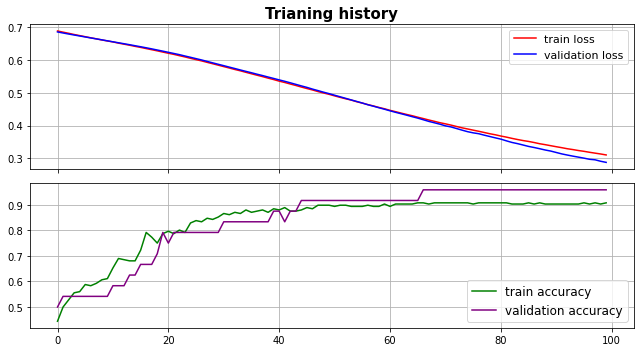

In [25]:
plot_history(history)

In [26]:
x_grid = np.linspace(data[:, 0].min(), data[:, 0].max(), 100)
y_grid = np.linspace(data[:, 1].min(), data[:, 1].max(), 100)

feature_space = np.zeros((100*100, 2))
n_row = 0
for i, x in enumerate(x_grid):
    for j, y in enumerate(y_grid):
        feature_space[n_row, :] = np.array([x, y])
        n_row += 1

In [27]:
predictions = model.predict(feature_space)
predicted_labels = np.where(predictions[:, 0] < 0.5, 1, 0).reshape(100, 100)

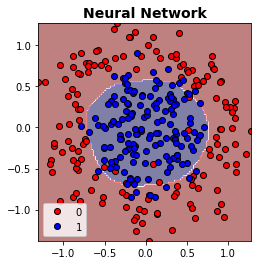

In [28]:
plt.imshow(predicted_labels, cmap="seismic_r", vmin=0, vmax=1, alpha=0.5,
           extent=[data[:, 0].min(), data[:, 0].max(),\
                   data[:, 1].min(), data[:, 1].max()])

plt.plot(data[labels == 0, 0], data[labels == 0, 1],
         color="r", label="0", ls="none", marker="o", mec="k")
plt.plot(data[labels == 1, 0], data[labels == 1, 1],
         color="b", label="1", ls="none", marker="o", mec="k")

plt.title("Neural Network",
          fontsize=14, fontweight="bold")
plt.xlim(data[:, 0].min(), data[:, 0].max())
plt.ylim(data[:, 1].min(), data[:, 1].max())
plt.legend()

As we can see, such model is capable of finding a non-linear decision boundary that separates rather well the circle dataset.

# 3. Convolutional Neural Networks

In [40]:
def loadCIFARdataset():
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
    width, height = (x_train.shape[1], x_train.shape[2])

    # Converting from integers to floats, and  
    # normalizing they range to [0-1]
    x_train = x_train.astype('float32') / 255
    x_test = x_test.astype('float32') / 255

    # Converting to one-hot encode for the target values
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    return (x_train, y_train, x_test, y_test, width, height)

label_dict = {    
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

x_train, y_train, x_test, y_test, width, height = loadCIFARdataset()

Text(0.5, 1.0, 'truck')

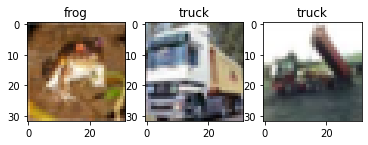

In [41]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(x_train[0, :3*width*height].reshape(width, height, 3))
ax[0].set_title(label_dict[np.argmax(y_train[0, :])])
ax[1].imshow(x_train[1, :3*width*height].reshape(width, height, 3))
ax[1].set_title(label_dict[np.argmax(y_train[1, :])])
ax[2].imshow(x_train[2, :3*width*height].reshape(width, height, 3))
ax[2].set_title(label_dict[np.argmax(y_train[2, :])])

Now that the CIFAR10 dataset has been successfully loaded, we can implement a CNN to classify it. The architecture will follow what was indicated in the problem statement.

In [60]:
n_epochs = 30
batch_size = 32

In [61]:
model = keras.models.Sequential()

# 2 Convolutional layers
model.add(keras.layers.Conv2D(filters=64, kernel_size=3,
                              padding="same", activation="relu",
                              input_shape=x_train.shape[1:]))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3,
                              padding="same", activation="relu"))
# Pooling layer
model.add(keras.layers.MaxPool2D(2))
# 2 Convolutional layers
model.add(keras.layers.Conv2D(filters=128, kernel_size=3,
                              padding="same", activation="relu"))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3,
                              padding="same", activation="relu"))
# Pooling layer
model.add(keras.layers.MaxPool2D(2))
# Flatten input to pass to dense layers
model.add(keras.layers.Flatten())
# Dense layers
model.add(keras.layers.Dense(1024, activation="relu"))
model.add(keras.layers.Dense(1024, activation="relu"))
# Output layer
model.add(keras.layers.Dense(10, activation="softmax"))


In [62]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=sgd, loss="categorical_crossentropy",
              metrics=["accuracy"])

In [63]:
early_stopping_cb = keras.callbacks.EarlyStopping(min_delta=1e-4, patience=5)

In [64]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=n_epochs,
                    callbacks=[early_stopping_cb],
                    validation_split=0.1)

Epoch 1/30
1407/1407 [==============================] - 13s 9ms/step - loss: 1.9436 - accuracy: 0.2954 - val_loss: 1.7089 - val_accuracy: 0.3712
Epoch 2/30
1407/1407 [==============================] - 12s 8ms/step - loss: 1.5385 - accuracy: 0.4495 - val_loss: 1.6808 - val_accuracy: 0.4196
Epoch 3/30
1407/1407 [==============================] - 12s 9ms/step - loss: 1.3399 - accuracy: 0.5224 - val_loss: 1.3265 - val_accuracy: 0.5266
Epoch 4/30
1407/1407 [==============================] - 12s 8ms/step - loss: 1.1989 - accuracy: 0.5732 - val_loss: 1.2228 - val_accuracy: 0.5610
Epoch 5/30
1407/1407 [==============================] - 12s 8ms/step - loss: 1.0657 - accuracy: 0.6219 - val_loss: 1.1469 - val_accuracy: 0.5996
Epoch 6/30
1407/1407 [==============================] - 12s 8ms/step - loss: 0.9375 - accuracy: 0.6703 - val_loss: 1.2071 - val_accuracy: 0.5794
Epoch 7/30
1407/1407 [==============================] - 12s 8ms/step - loss: 0.8122 - accuracy: 0.7149 - val_loss: 1.1019 - val_ac

After only 12 epochs, the early stopping callback triggered and we had an accuracy of over 93%!